In [1]:
# Load experiment P7fake02
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt


with open("train_history_fake02.pkl", "rb") as f:
    history_trainP7fake02 = pickle.load(f)
with open("test_history_fake02.pkl", "rb") as f:
    history_testP7fake02 = pickle.load(f)

with open("output_fake02.pkl", "rb") as f:
    output_P7fake02 = pickle.load(f)
with open("cost_fake02.pkl", "rb") as f:
    cost_P7fake02 = pickle.load(f)
with open("test_targets_fake02.pkl", "rb") as f:
    test_targets_P7fake02 = pickle.load(f)
with open("test_predictions_fake02.pkl", "rb") as f:
    test_predictions_P7fake02 = pickle.load(f)
with open("per_point_losses_test_fake02.pkl", "rb") as f:
    per_point_losses_testP7fake02 = pickle.load(f)
with open("average_loss_per_model_fake02.pkl", "rb") as f:
    average_loss_per_modelP7fake02 = pickle.load(f)

# Load experiment P7drop05shake05fake02
with open("train_history_drop05shake05fake02.pkl", "rb") as f:
    history_trainP7drop = pickle.load(f)
with open("test_history_drop05shake05fake02.pkl", "rb") as f:
    history_testP7drop = pickle.load(f)

with open("output_drop05shake05fake02.pkl", "rb") as f:
    output_P7drop = pickle.load(f)
with open("cost_drop05shake05fake02.pkl", "rb") as f:
    cost_P7drop = pickle.load(f)
with open("test_targets_drop05shake05fake02.pkl", "rb") as f:
    test_targets_P7drop = pickle.load(f)
with open("test_predictions_drop05shake05fake02.pkl", "rb") as f:
    test_predictions_P7drop = pickle.load(f)
with open("per_point_losses_test_drop05shake05fake02.pkl", "rb") as f:
    per_point_losses_testP7drop = pickle.load(f)
with open("average_loss_per_model_drop05shake05fake02.pkl", "rb") as f:
    average_loss_per_modelP7drop = pickle.load(f)

print(f"P7fake02 final loss: {cost_P7fake02:.6f}")
print(f"P7drop05shake05fake02 final loss: {cost_P7drop:.6f}")

P7fake02 final loss: 1.768758
P7drop05shake05fake02 final loss: 1.599282


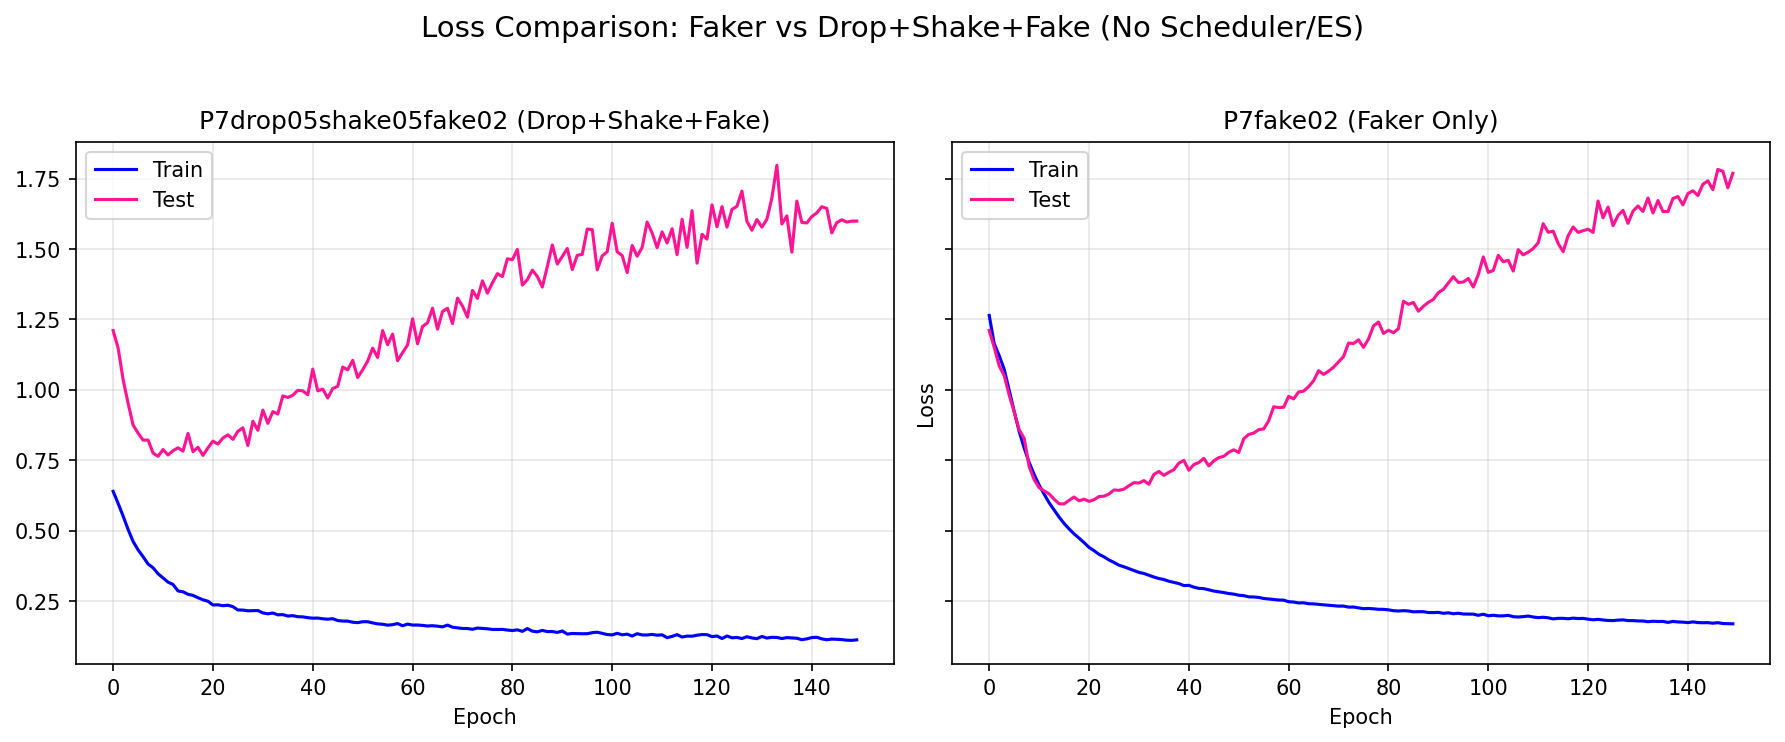

In [2]:
import matplotlib.pyplot as plt

# Fake only (P7fake02)
# Drop + Shake + Fake (P7drop05shake05fake02)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150, sharey=True)

# Subplot 1: P7drop05shake05fake02
axes[0].plot(history_trainP7drop, label="Train", color="blue")
axes[0].plot(history_testP7drop, label="Test", color="deeppink")
axes[0].set_title("P7drop05shake05fake02 (Drop+Shake+Fake)")
axes[0].set_xlabel("Epoch")
axes[0].grid(alpha=0.3)
axes[0].legend()

# Subplot 2: P7fake02 
axes[1].plot(history_trainP7fake02, label="Train", color="blue")
axes[1].plot(history_testP7fake02, label="Test", color="deeppink")
axes[1].set_title("P7fake02 (Faker Only)")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.suptitle("Loss Comparison: Faker vs Drop+Shake+Fake (No Scheduler/ES)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("loss_comparison_faker_vs_dropshakefake.jpg", dpi=300, bbox_inches="tight")
plt.show()

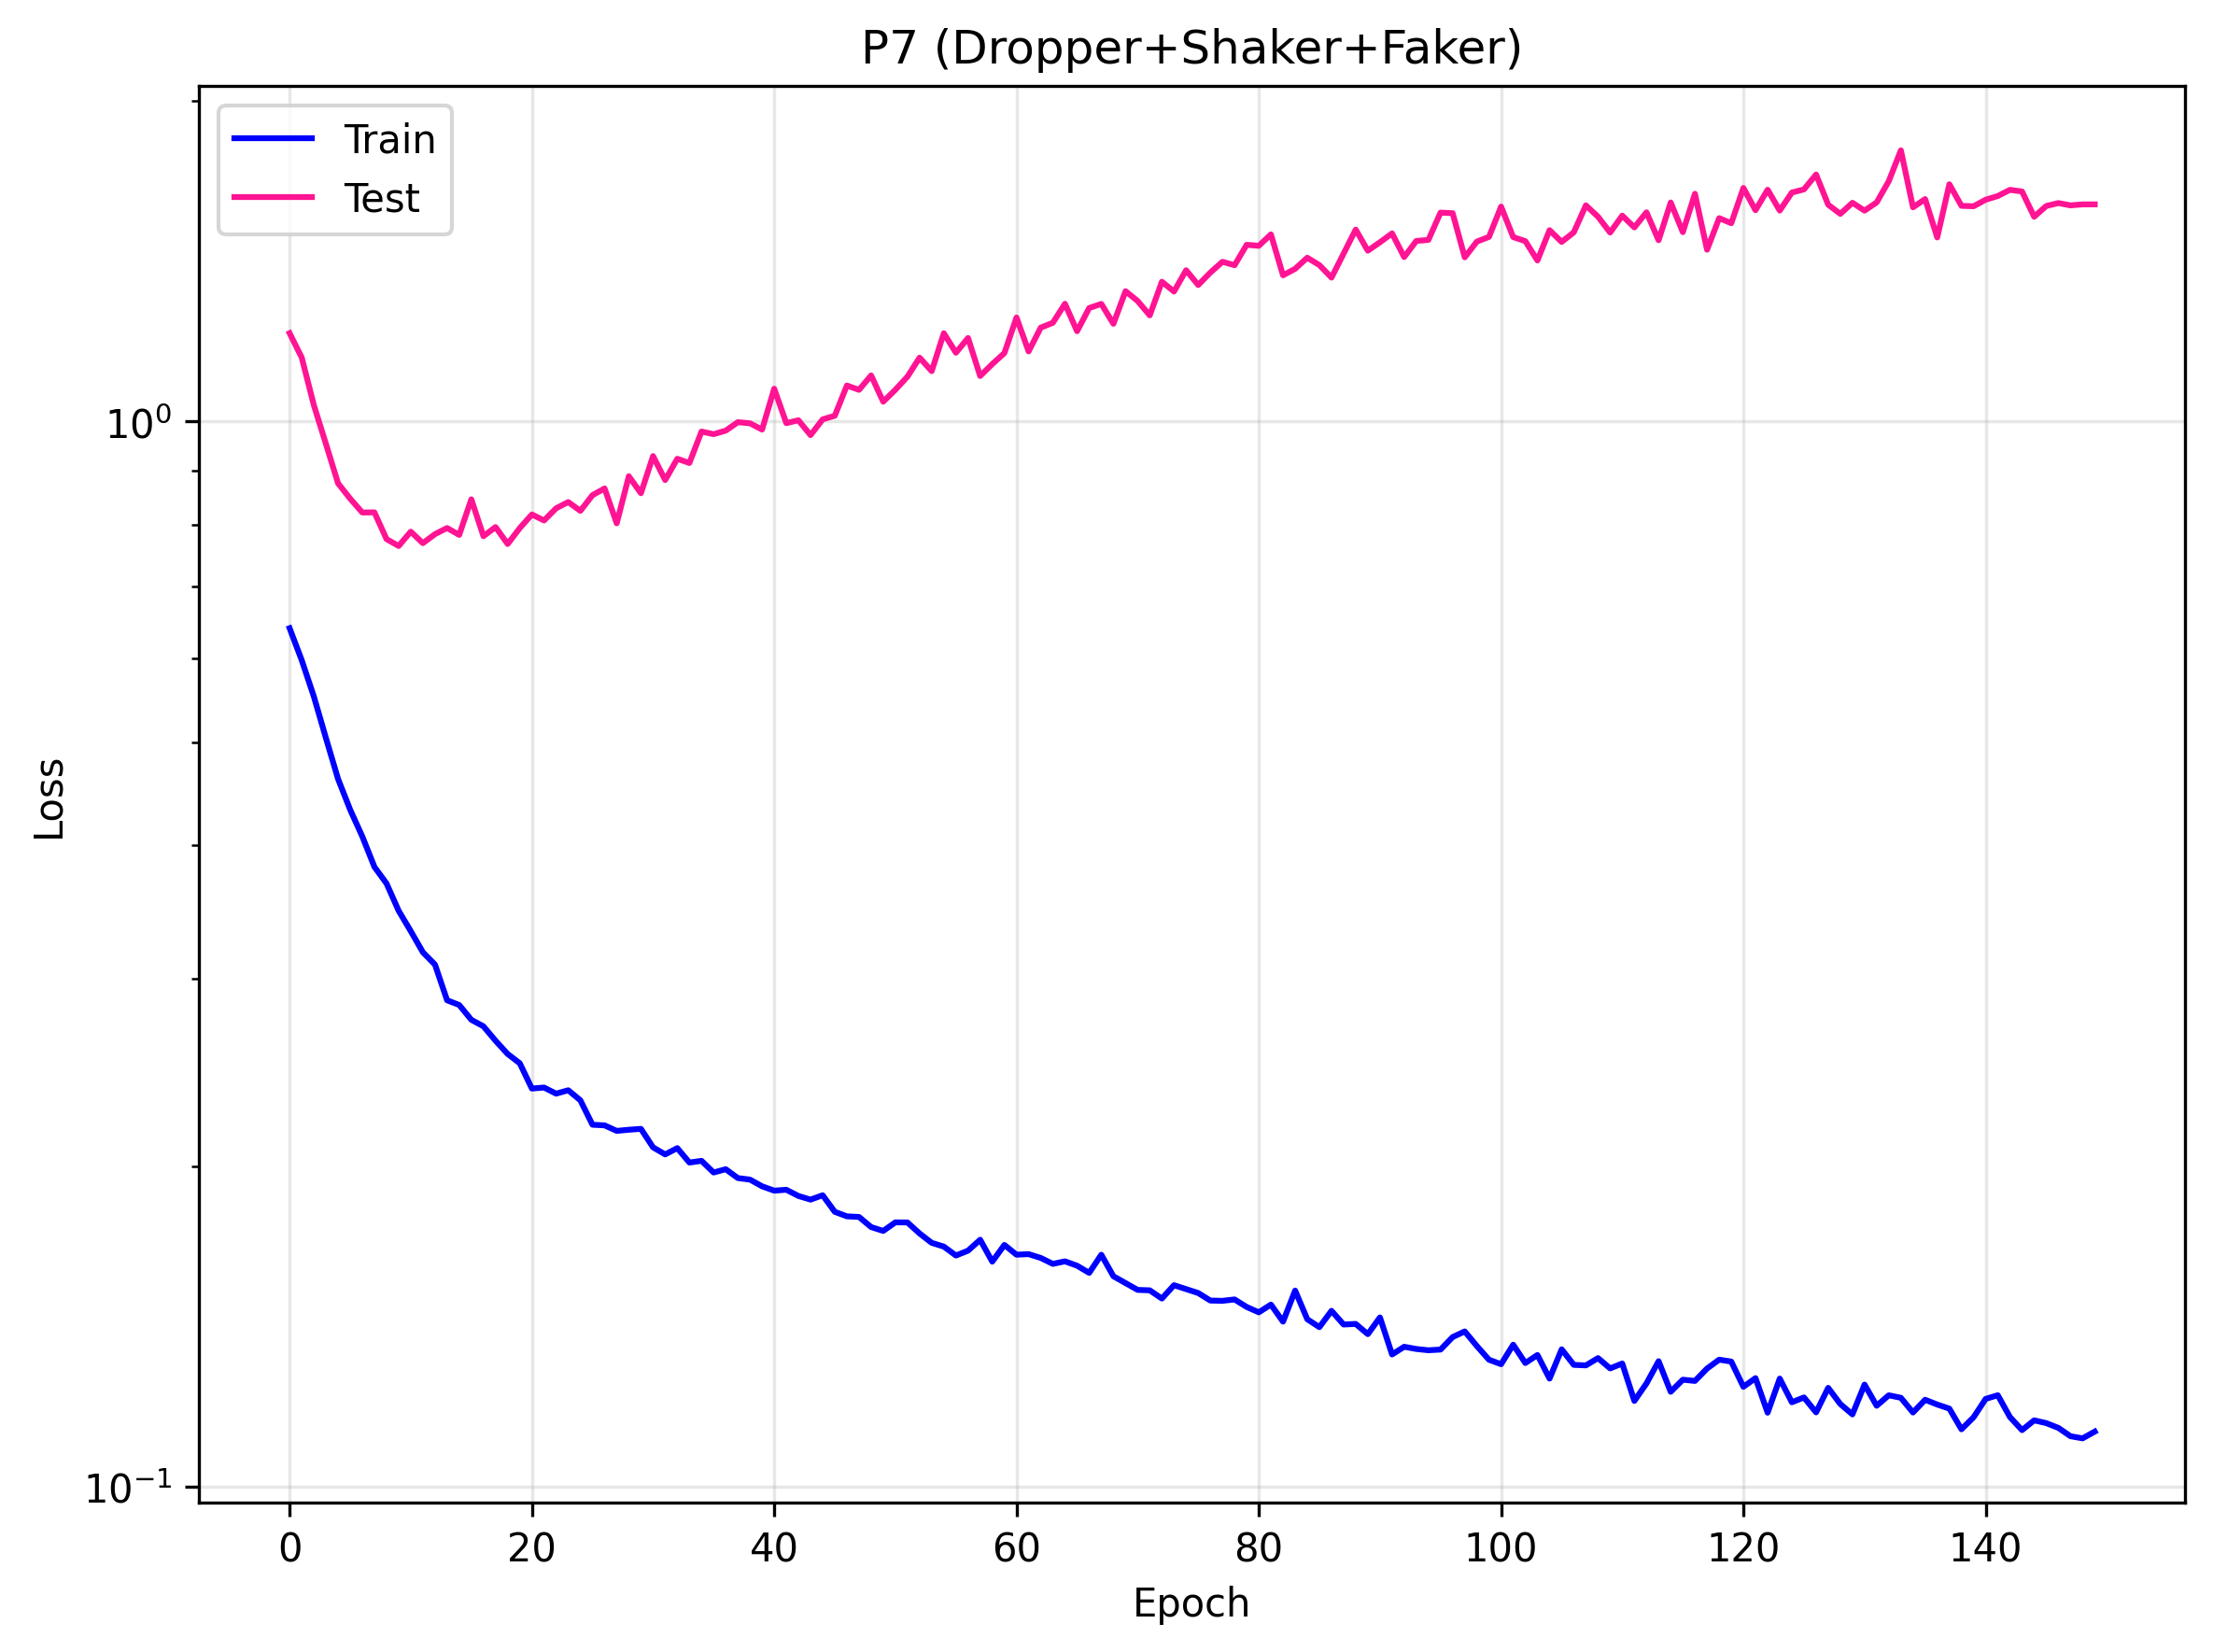

0.1127273440361023
1.599281907081604


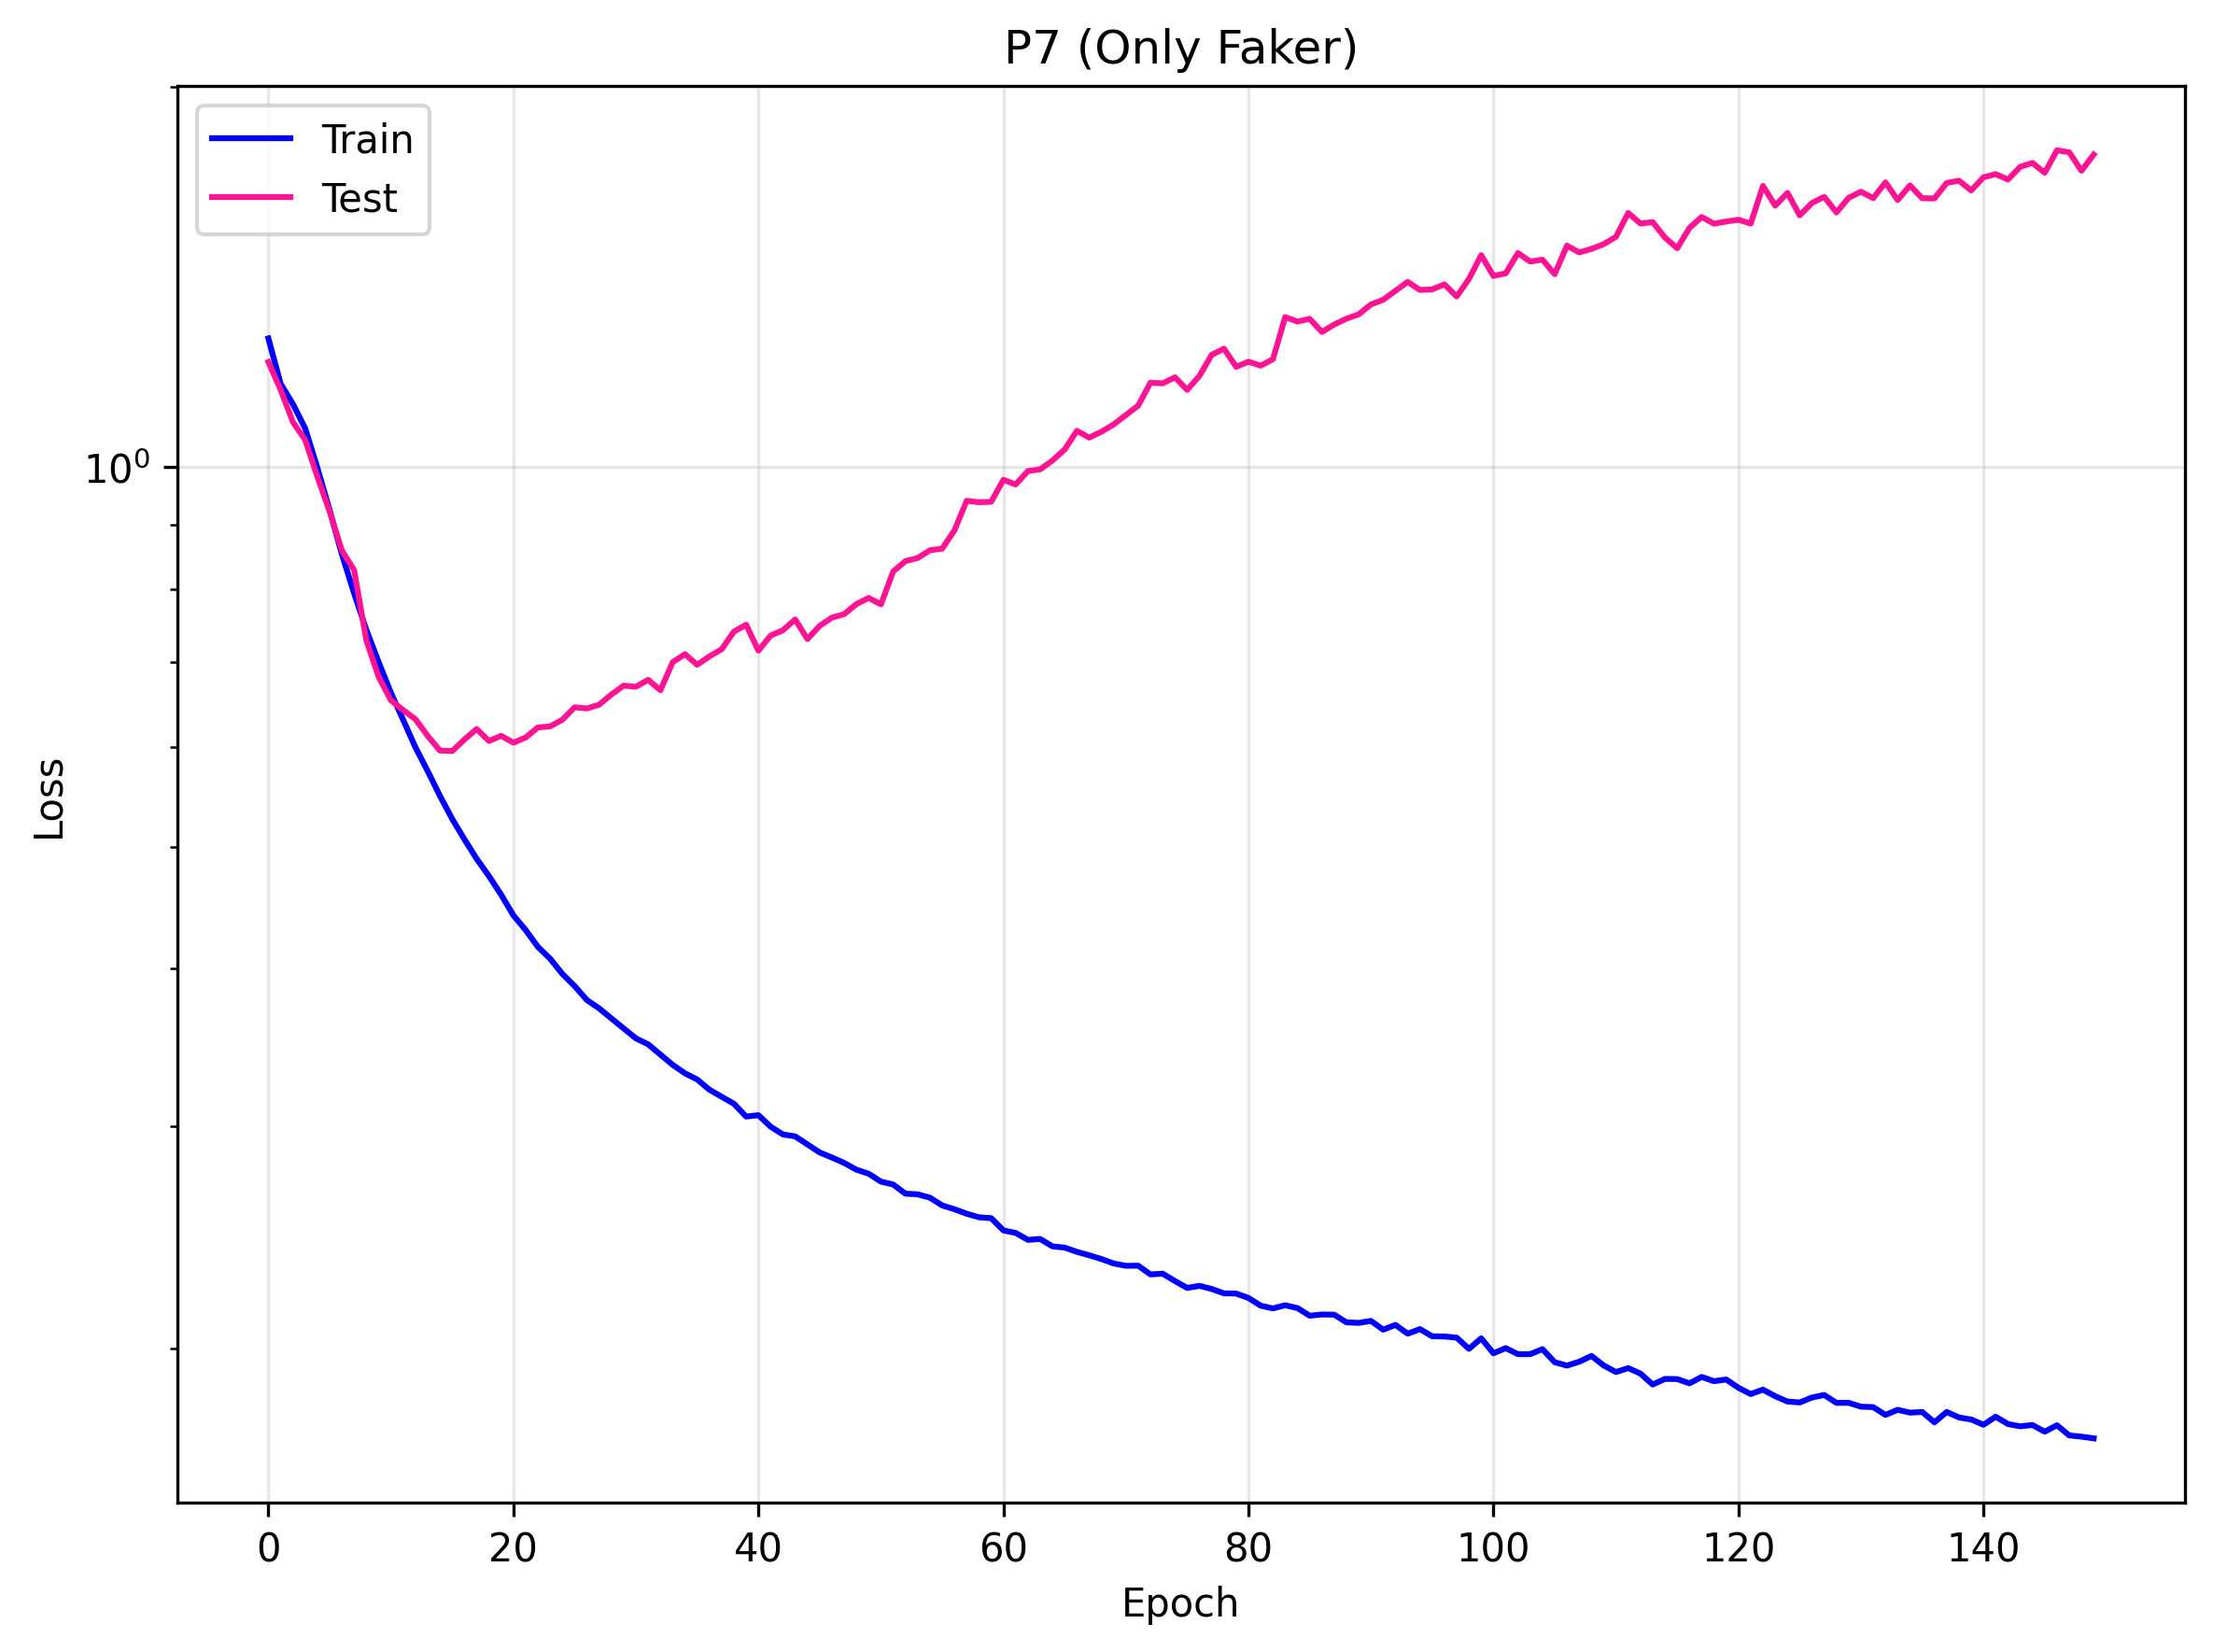

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi=300)
plt.plot(history_trainP7drop, label="Train", color="blue")
plt.plot(history_testP7drop, label="Test", color="deeppink")
plt.title("P7 (Dropper+Shaker+Faker)")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("P7_dropshakefake.pdf", dpi=300, bbox_inches="tight", pad_inches=0.3, transparent=True)
plt.show()
plt.close()

print(history_trainP7drop[-1])
print(history_testP7drop[-1])

plt.figure(figsize=(8,6), dpi=300)
plt.plot(history_trainP7fake02, label="Train", color="blue")
plt.plot(history_testP7fake02, label="Test", color="deeppink")
plt.title("P7 (Only Faker)")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("P7_faker.pdf", dpi=300, bbox_inches="tight", pad_inches=0.3, transparent=True)
plt.show()
plt.close()


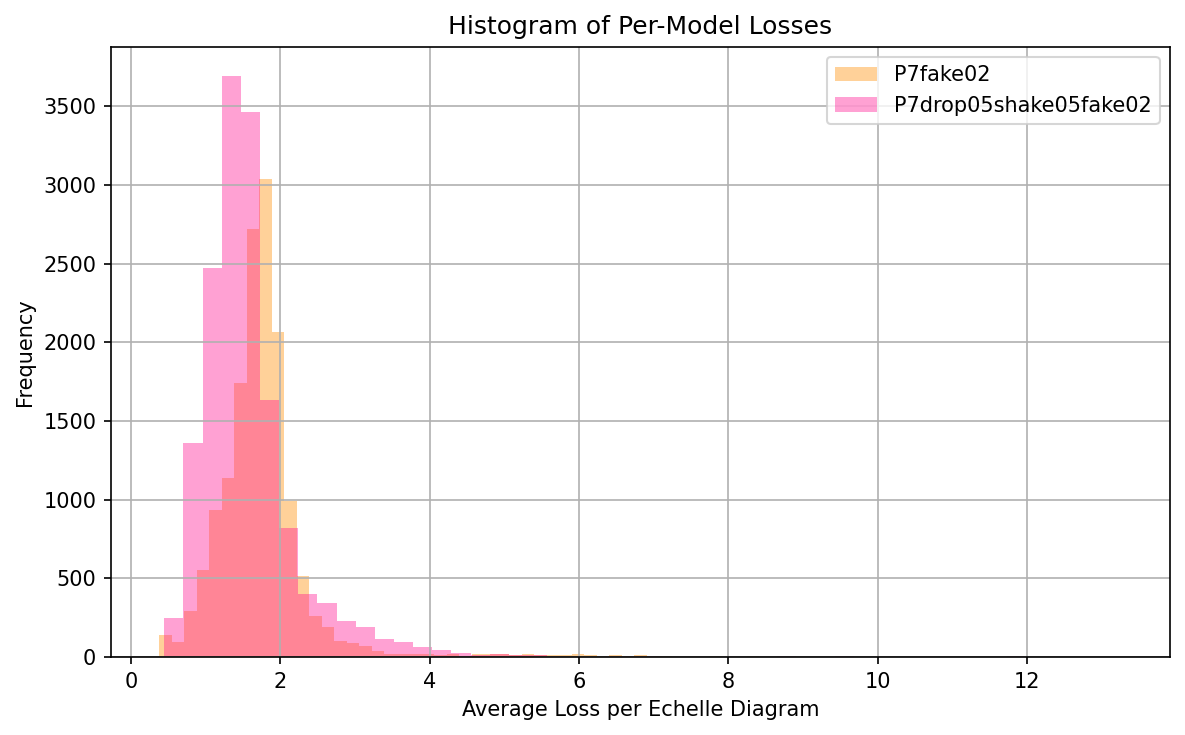

In [29]:
plt.figure(figsize=(8, 5), dpi=150)
plt.hist(average_loss_per_modelP7fake02, bins=50, alpha=0.4, label="P7fake02", color="darkorange")
plt.hist(average_loss_per_modelP7drop, bins=50, alpha=0.4, label="P7drop05shake05fake02", color="deeppink")
plt.xlabel("Average Loss per Echelle Diagram")
plt.ylabel("Frequency")
plt.title("Histogram of Per-Model Losses")
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig("histogram_loss_per_model_P7fake_vs_drop.png", dpi=300)
plt.show()

In [15]:
# read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grid = pd.read_pickle("outputs_in_instab_strip.pkl")
print(grid.columns)
from sklearn.model_selection import train_test_split
import torch

l_values = [0, 1, 2] 
l_columns = {l: [col for col in grid.columns if col.endswith(f"_l_{l}")] for l in l_values}

X_frequencies = np.hstack([grid[l_columns[l]].values for l in l_values])  
delta_nu_values = grid["delta_nu"].values[:, np.newaxis] 
mod_frequencies = X_frequencies % delta_nu_values 

X = np.stack((X_frequencies, mod_frequencies), axis=-1)
y = np.hstack([np.full_like(grid[l_columns[l]].values, l) for l in l_values])  

print(f"X-matrix shape: {X.shape}")
print(f"y-matrix shape: {y.shape}") 

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long) 
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Index(['F_l_0', 'F_l_1', 'F_l_2', 'O1_l_0', 'O1_l_1', 'O1_l_2', 'O2_l_0',
       'O2_l_1', 'O2_l_2', 'O3_l_0', 'O3_l_1', 'O3_l_2', 'O4_l_0', 'O4_l_1',
       'O4_l_2', 'O5_l_0', 'O5_l_1', 'O5_l_2', 'O6_l_0', 'O6_l_1', 'O6_l_2',
       'O7_l_0', 'O7_l_1', 'O7_l_2', 'O8_l_0', 'O8_l_1', 'O8_l_2', 'O9_l_0',
       'O9_l_1', 'O9_l_2', 'delta_nu'],
      dtype='object')
X-matrix shape: (153314, 30, 2)
y-matrix shape: (153314, 30)


In [16]:
def plot_prediction_overlay(frequencies, mod_frequencies, true_labels, pred_labels, title):
    """
    Helper function to overlay predictions on top of true labels in ν - mod(ν, Δν) space.
    """
    plt.figure(figsize=(6, 6), dpi=150)
    scatter = plt.scatter(frequencies, mod_frequencies, c=pred_labels, cmap="Set1", s=10, alpha=0.8, label="Predicted")
    plt.scatter(frequencies, mod_frequencies, c=true_labels, cmap="Set1", s=3, alpha=0.2, label="True", marker='x')
    plt.xlabel("ν (μHz)")
    plt.ylabel("ν mod Δν (μHz)")
    plt.title(title)
    plt.colorbar(scatter, label="Predicted l")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Find best and worst prediction index
best_idx = np.argmin(average_loss_per_modelP7drop)
worst_idx = np.argmax(average_loss_per_modelP7drop)

# Plot best prediction
freqs_best = X_test[best_idx][:, 0].numpy()
mods_best = X_test[best_idx][:, 1].numpy()
true_best = test_targets_P7drop[best_idx]
pred_best = test_predictions_P7drop[best_idx].argmax(axis=1)

plot_prediction_overlay(freqs_best, mods_best, true_best, pred_best, "Best Prediction (Lowest Loss)")

# Plot worst prediction
freqs_worst = X_test[worst_idx][:, 0].numpy()
mods_worst = X_test[worst_idx][:, 1].numpy()
true_worst = test_targets_P7drop[worst_idx]
pred_worst = test_predictions_P7drop[worst_idx].argmax(axis=1)

plot_prediction_overlay(freqs_worst, mods_worst, true_worst, pred_worst, "Worst Prediction (Highest Loss)")

AxisError: axis 1 is out of bounds for array of dimension 1

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_conf_matrix(y_true_all, y_pred_all, title):
    cm = confusion_matrix(y_true_all, y_pred_all, labels=[0, 1, 2, 3])
    plt.figure(figsize=(6, 5), dpi=150)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.xlabel("Predicted l")
    plt.ylabel("True l")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Flatten all points for confusion matrix
mask_valid = test_targets_P7drop.flatten() != -1
y_true_all = test_targets_P7drop.flatten()[mask_valid]
y_pred_all = test_predictions_P7drop.reshape(-1, 4)[mask_valid].argmax(axis=1)

plot_conf_matrix(y_true_all, y_pred_all, "Confusion Matrix (Drop+Shake+Fake)")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 114990 but corresponding boolean dimension is 459960

[0 0 2 2 2 3 3 3 2 3 3 0 2 0 3 3 3 3 3 0 1 1 1 1 1 3 2 2 0 1 1 2 2 2 3]


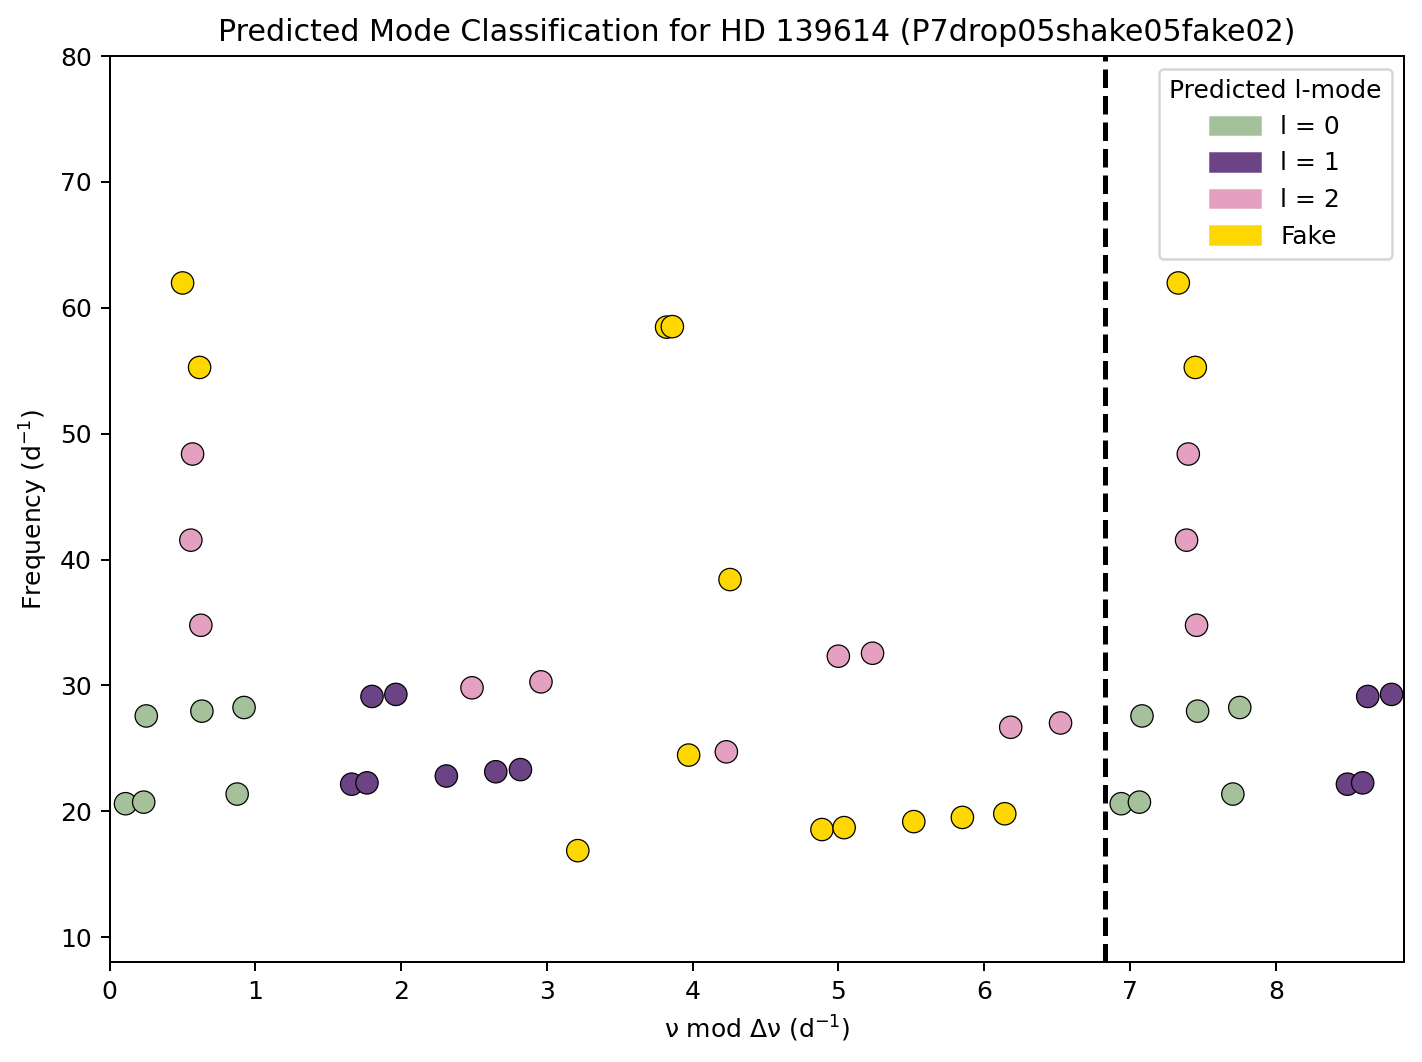

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- Input frequencies ---
frequencies = np.array([
    21.36513, 27.95328, 34.77609, 41.53747, 48.37933, 55.25743, 61.97086,
    16.87165, 32.55347, 38.40601, 58.46084, 28.24243, 27.01307, 20.59936,
    18.54655, 18.69868, 19.17648, 19.50970, 19.80056, 20.72404, 22.15081,
    22.25558, 22.79990, 23.13894, 23.30843, 24.46210, 24.72073, 26.67124,
    27.57177, 29.12013, 29.28361, 29.80605, 30.27912, 32.31897, 58.50036
])
delta_nu = 6.83 
nu_mod_delta_nu = np.mod(frequencies, delta_nu)
X_hd = torch.tensor(np.stack([frequencies, nu_mod_delta_nu], axis=1), dtype=torch.float32).unsqueeze(0)

# --- Model Definitions (unchanged) ---
class PointNet(torch.nn.Module):
    def __init__(self, num_classes=4, point_dimension=2, dropout=0.3):
        super(PointNet, self).__init__()
        a = 3
        nfeat = 64
        self.conv_1_a = torch.nn.Conv1d(1, nfeat, kernel_size=a, padding=1)
        self.conv_1_b = torch.nn.Conv1d(1, nfeat, kernel_size=a, padding=1)
        self.conv_2 = torch.nn.Conv1d(nfeat, nfeat, kernel_size=a)
        self.bn_1 = torch.nn.BatchNorm1d(nfeat)
        self.bn_2 = torch.nn.BatchNorm1d(nfeat)
    def forward(self, x):
        batch_size, num_points, _ = x.shape
        x_freq = x[:, :, 0].unsqueeze(1)
        x_modnu = x[:, :, 1].unsqueeze(1)
        x_freq = torch.nn.functional.pad(x_freq, (1, 1), mode='replicate')
        x_modnu = torch.nn.functional.pad(x_modnu, (1, 1), mode='circular')
        x = self.conv_1_a(x_freq) + self.conv_1_b(x_modnu)
        x = torch.nn.functional.relu(self.bn_1(x))
        x = torch.nn.functional.relu(self.bn_2(self.conv_2(x)))
        x = torch.nn.functional.max_pool1d(x, kernel_size=x.size(-1))
        return x.view(batch_size, -1)

class SegmentationPointNet(torch.nn.Module):
    def __init__(self, num_classes=4, point_dimension=2, dropout=0.3):
        super(SegmentationPointNet, self).__init__()
        self.base_pointnet = PointNet(num_classes=num_classes, point_dimension=point_dimension)
        nfeat = 64
        nhidden = 64
        self.fc_1 = torch.nn.Linear(nfeat + 2, nhidden)
        self.fc_2 = torch.nn.Linear(nhidden, num_classes)
    def forward(self, x):
        global_feat = self.base_pointnet(x).unsqueeze(1).repeat(1, x.shape[1], 1)
        x = torch.cat([x, global_feat], dim=2)
        x = torch.nn.functional.relu(self.fc_1(x))
        return torch.nn.functional.log_softmax(self.fc_2(x), dim=2)

model_path = "segmentation_pointnet_drop05shake05fake02.pth"
#model_path = "segmentation_pointnet_fake02.pth"
model = SegmentationPointNet()
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

# --- Prediction ---
with torch.no_grad():
    logits_hd = model(X_hd)
    probs_hd = torch.exp(logits_hd)[0].numpy()
    preds_hd = np.argmax(probs_hd, axis=1)
    print(preds_hd)

# --- Visualization ---
color_map = {0: '#a5c19b', 1: '#6c4385', 2: '#e3a0c0', 3: 'gold'}  # Added class 3
colors_pred = [color_map[int(p)] for p in preds_hd]

legend_elements = [
    mpatches.Patch(color=color_map[0], label='l = 0'),
    mpatches.Patch(color=color_map[1], label='l = 1'),
    mpatches.Patch(color=color_map[2], label='l = 2'),
    mpatches.Patch(color=color_map[3], label='Fake')
]

marker_size = 80
fig, ax = plt.subplots(figsize=(8, 6), dpi=180)
sc = ax.scatter(nu_mod_delta_nu, frequencies, c=colors_pred, edgecolors='black', linewidths=0.5, s=marker_size)
ax.scatter(nu_mod_delta_nu + delta_nu, frequencies, c=colors_pred, edgecolors='black', linewidths=0.5, s=marker_size)
ax.axvline(delta_nu, color='black', linestyle='--', linewidth=2)
ax.set_xlim(0, delta_nu * 1.3)
ax.set_ylim(8, 80)
ax.legend(handles=legend_elements, title="Predicted l-mode", loc="upper right")
ax.set_title("Predicted Mode Classification for HD 139614 (P7drop05shake05fake02)")
ax.set_xlabel("ν mod Δν (d$^{-1}$)")
ax.set_ylabel("Frequency (d$^{-1}$)")
plt.tight_layout()
plt.show()


[1 1 3 3 3 2 2 1 0 2 1 1 2 1 1 1 1 0 0 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1]


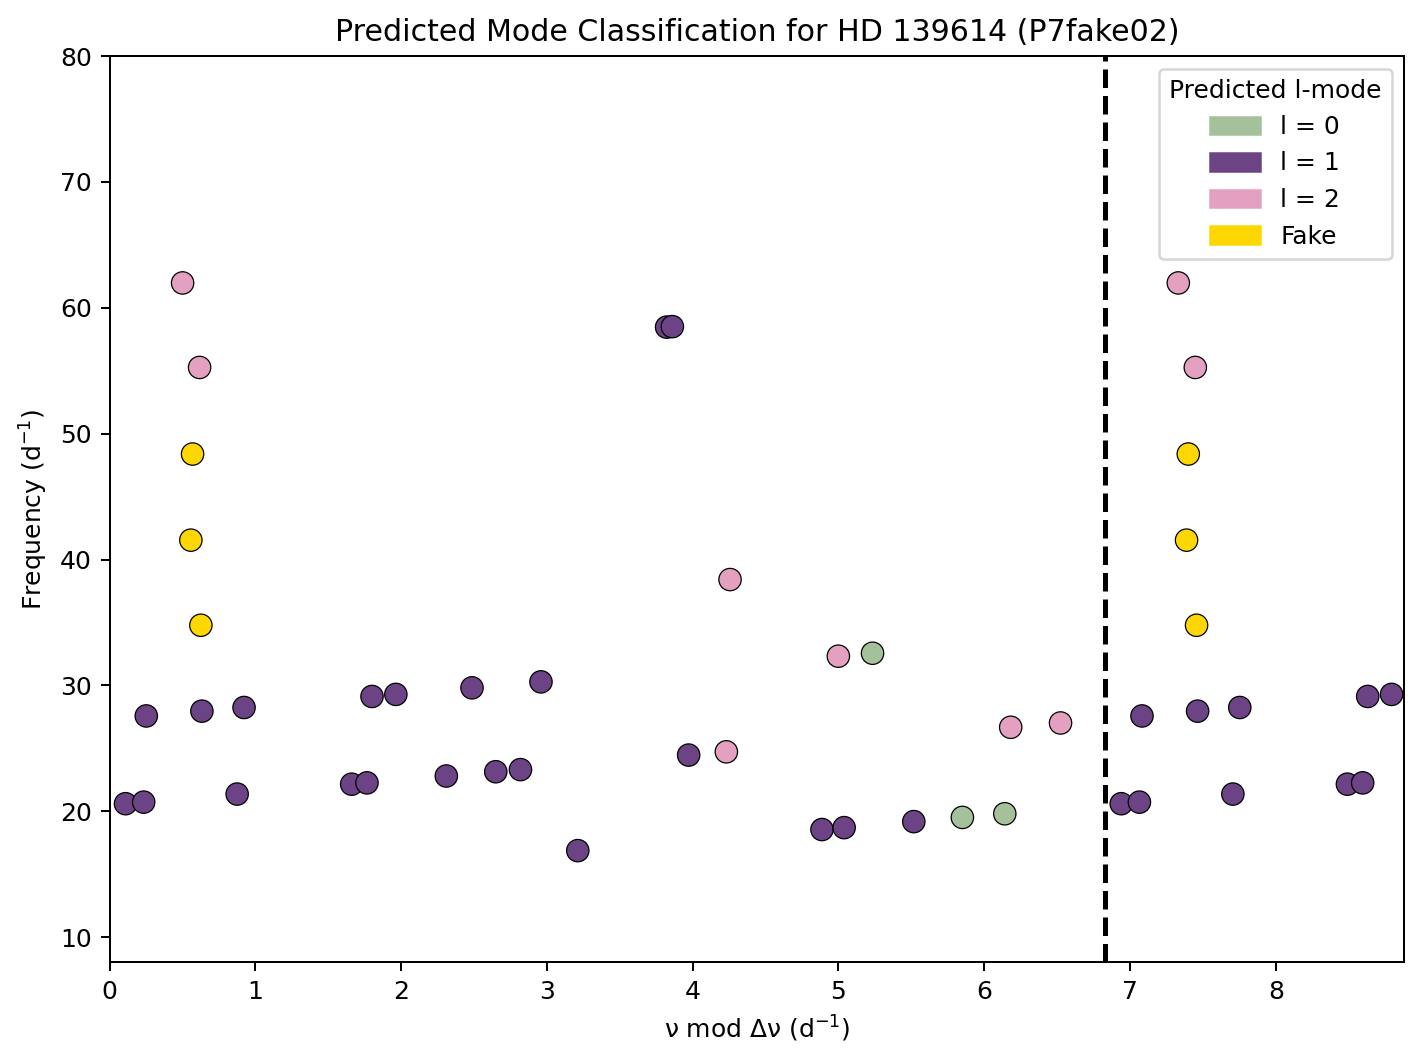

In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

frequencies = np.array([
    21.36513, 27.95328, 34.77609, 41.53747, 48.37933, 55.25743, 61.97086,
    16.87165, 32.55347, 38.40601, 58.46084, 28.24243, 27.01307, 20.59936,
    18.54655, 18.69868, 19.17648, 19.50970, 19.80056, 20.72404, 22.15081,
    22.25558, 22.79990, 23.13894, 23.30843, 24.46210, 24.72073, 26.67124,
    27.57177, 29.12013, 29.28361, 29.80605, 30.27912, 32.31897, 58.50036
])
delta_nu = 6.83 
nu_mod_delta_nu = np.mod(frequencies, delta_nu)
X_hd = torch.tensor(np.stack([frequencies, nu_mod_delta_nu], axis=1), dtype=torch.float32).unsqueeze(0)

class PointNet(torch.nn.Module):
    def __init__(self, num_classes=4, point_dimension=2, dropout=0.3):
        super(PointNet, self).__init__()
        a = 3
        nfeat = 64
        self.conv_1_a = torch.nn.Conv1d(1, nfeat, kernel_size=a, padding=1)
        self.conv_1_b = torch.nn.Conv1d(1, nfeat, kernel_size=a, padding=1)
        self.conv_2 = torch.nn.Conv1d(nfeat, nfeat, kernel_size=a)
        self.bn_1 = torch.nn.BatchNorm1d(nfeat)
        self.bn_2 = torch.nn.BatchNorm1d(nfeat)
    def forward(self, x):
        batch_size, num_points, _ = x.shape
        x_freq = x[:, :, 0].unsqueeze(1)
        x_modnu = x[:, :, 1].unsqueeze(1)
        x_freq = torch.nn.functional.pad(x_freq, (1, 1), mode='replicate')
        x_modnu = torch.nn.functional.pad(x_modnu, (1, 1), mode='circular')
        x = self.conv_1_a(x_freq) + self.conv_1_b(x_modnu)
        x = torch.nn.functional.relu(self.bn_1(x))
        x = torch.nn.functional.relu(self.bn_2(self.conv_2(x)))
        x = torch.nn.functional.max_pool1d(x, kernel_size=x.size(-1))
        return x.view(batch_size, -1)

class SegmentationPointNet(torch.nn.Module):
    def __init__(self, num_classes=4, point_dimension=2, dropout=0.3):
        super(SegmentationPointNet, self).__init__()
        self.base_pointnet = PointNet(num_classes=num_classes, point_dimension=point_dimension)
        nfeat = 64
        nhidden = 64
        self.fc_1 = torch.nn.Linear(nfeat + 2, nhidden)
        self.fc_2 = torch.nn.Linear(nhidden, num_classes)
    def forward(self, x):
        global_feat = self.base_pointnet(x).unsqueeze(1).repeat(1, x.shape[1], 1)
        x = torch.cat([x, global_feat], dim=2)
        x = torch.nn.functional.relu(self.fc_1(x))
        return torch.nn.functional.log_softmax(self.fc_2(x), dim=2)

#model_path = "segmentation_pointnet_drop05shake05fake02.pth"
model_path = "segmentation_pointnet_fake02.pth"
model = SegmentationPointNet()
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

with torch.no_grad():
    logits_hd = model(X_hd)
    probs_hd = torch.exp(logits_hd)[0].numpy()
    preds_hd = np.argmax(probs_hd, axis=1)
    print(preds_hd)

color_map = {0: '#a5c19b', 1: '#6c4385', 2: '#e3a0c0', 3: 'gold'}  # Added class 3
colors_pred = [color_map[int(p)] for p in preds_hd]

legend_elements = [
    mpatches.Patch(color=color_map[0], label='l = 0'),
    mpatches.Patch(color=color_map[1], label='l = 1'),
    mpatches.Patch(color=color_map[2], label='l = 2'),
    mpatches.Patch(color=color_map[3], label='Fake')
]

marker_size = 80
fig, ax = plt.subplots(figsize=(8, 6), dpi=180)
sc = ax.scatter(nu_mod_delta_nu, frequencies, c=colors_pred, edgecolors='black', linewidths=0.5, s=marker_size)
ax.scatter(nu_mod_delta_nu + delta_nu, frequencies, c=colors_pred, edgecolors='black', linewidths=0.5, s=marker_size)
ax.axvline(delta_nu, color='black', linestyle='--', linewidth=2)
ax.set_xlim(0, delta_nu * 1.3)
ax.set_ylim(8, 80)
ax.legend(handles=legend_elements, title="Predicted l-mode", loc="upper right")
ax.set_title("Predicted Mode Classification for HD 139614 (P7fake02)")
ax.set_xlabel("ν mod Δν (d$^{-1}$)")
ax.set_ylabel("Frequency (d$^{-1}$)")
plt.tight_layout()
plt.show()